<H1>Linear Regression and Classification</H1><p>
Linear regression의 대상이 되는 트레이닝셋 데이터는 미국 성인의 키/몸무게 파일을 이용해보겠습니다. 키를 가지고 몸무게를 예측해보는 것입니다.

먼저 관련 파이썬 모듈들을 임포트합니다

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import scipy.stats as stats

이제 키/몸무게 파일을 로드해보겠습니다. 이제부터 pandas 모듈을 주로 사용합니다.

In [3]:
df = pd.read_csv('/Users/khan//Documents/deeplearning/zero_to_deep_learning_udemy/data/weight-height.csv')

트레이닝 셋이 로드하면 첫번째로 해야할 일은 어떤 필드들이 있고 그 필드에 존재하는 값들의 범위, 존재여부 등을 확인해보는 것입니다. 먼저 파일의 처음 몇 레코드를 보겠습니다.

In [7]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


이제 이 데이터들을 한번 시각화해서 보겠습니다.

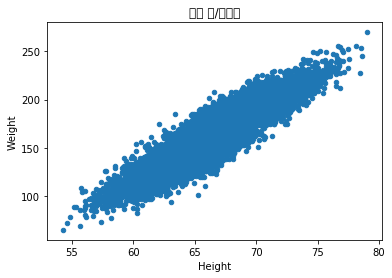

In [11]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='성인 키/몸무게')

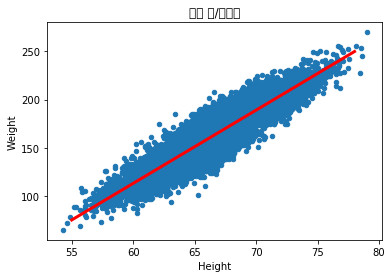

In [13]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='성인 키/몸무게')
# Here we're plotting the red line 'by hand' with fixed values
# We'll try to learn this line with an algorithm below
plt.plot([55, 78], [75, 250], color='red', linewidth=3)

이제 이 그래프위에 실제로 직선을 그려가면서 이 패턴에 가장 최적화된 직선이 무엇일지 알아보겠습니다. 먼저 기울기가 w이고 y 절편이 b인 직선을 정의해보겠습니다.

In [15]:
def line(x, w=0, b=0):
    return x * w + b

In [16]:
x = np.linspace(55, 80, 100)

In [17]:
x

array([ 55.        ,  55.25252525,  55.50505051,  55.75757576,
        56.01010101,  56.26262626,  56.51515152,  56.76767677,
        57.02020202,  57.27272727,  57.52525253,  57.77777778,
        58.03030303,  58.28282828,  58.53535354,  58.78787879,
        59.04040404,  59.29292929,  59.54545455,  59.7979798 ,
        60.05050505,  60.3030303 ,  60.55555556,  60.80808081,
        61.06060606,  61.31313131,  61.56565657,  61.81818182,
        62.07070707,  62.32323232,  62.57575758,  62.82828283,
        63.08080808,  63.33333333,  63.58585859,  63.83838384,
        64.09090909,  64.34343434,  64.5959596 ,  64.84848485,
        65.1010101 ,  65.35353535,  65.60606061,  65.85858586,
        66.11111111,  66.36363636,  66.61616162,  66.86868687,
        67.12121212,  67.37373737,  67.62626263,  67.87878788,
        68.13131313,  68.38383838,  68.63636364,  68.88888889,
        69.14141414,  69.39393939,  69.64646465,  69.8989899 ,
        70.15151515,  70.4040404 ,  70.65656566,  70.90

In [18]:
yhat = line(x, w=0, b=0)

In [19]:
yhat

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

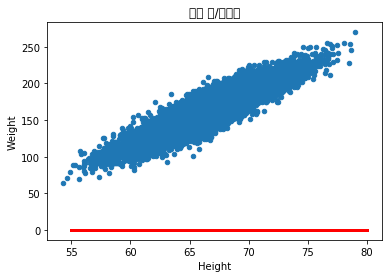

In [20]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='성인 키/몸무게')
plt.plot(x, yhat, color='red', linewidth=3)

비용 함수 정의

In [7]:
def mean_squared_error(y_true, y_pred):
    s = (y_true - y_pred)**2
    return s.mean()

In [10]:
X = df[['Height']].values
y_true = df['Weight'].values

In [23]:
y_true

array([ 241.89356318,  162.31047252,  212.74085556, ...,  128.47531878,
        163.85246135,  113.64910268])

In [24]:
y_pred = line(X)

In [25]:
y_pred

array([[ 0.],
       [ 0.],
       [ 0.],
       ..., 
       [ 0.],
       [ 0.],
       [ 0.]])

In [26]:
mean_squared_error(y_true, y_pred.ravel())

27093.83757456157

각자 w와 b의 값을 바꿔가면서 플로팅을 해보면서 비용함수의 값이 어떻게 바뀌는지 보기 바랍니다

w의 값을 고정하고 b의 값만 바꿀 경우 비용이 어떻게 감소하는지 살펴봅시다. 비용의 변화를 그래프로 그려보겠습니다.

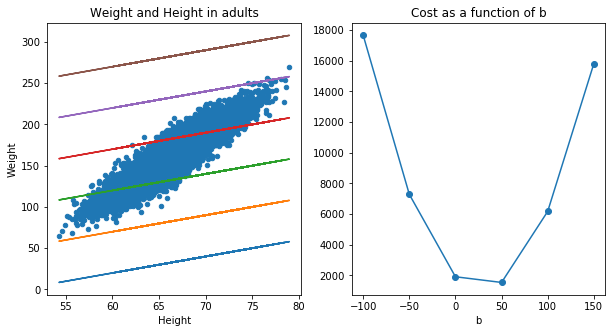

In [30]:
plt.figure(figsize=(10, 5))
# we are going to draw 2 plots in the same figure
# first plot, data and a few lines
ax1 = plt.subplot(121)
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults', ax=ax1)
# let's explore the cost function for a few values of b between -100 and +150
bbs = np.array([-100, -50, 0, 50, 100, 150])
mses = []  # we will append the values of the cost here, for each line
for b in bbs:
    y_pred = line(X, w=2, b=b)
    mse = mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(X, y_pred)
    

# second plot: Cost function
ax2 = plt.subplot(122)
plt.plot(bbs, mses, 'o-')
plt.title('Cost as a function of b')
plt.xlabel('b')

## 이제 scikit learn의 linear regression을 실행해보겠습니다.
#### 성별과 신장 필드의 값을 바탕으로 트레이닝 셋의 feature를 만듭니다

In [13]:
# titanic_X = titanic_X[:, [1, 4, 3]]
X = df[['Gender', 'Height']].values
y_true = df['Weight'].values

In [11]:
#### 먼저 gender의 값을 숫자로 인코딩해줍니다

In [15]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
# 성별 정보는 0 인덱스에 존재
label_encoder = enc.fit(X[:, 0])
print ("Categorical classes:", label_encoder.classes_)

# 성별값이 어떤 숫자로 변경되었는지 프린트
integer_classes = label_encoder.transform(label_encoder.classes_)
print ("Integer classes:", integer_classes)

# 이제 feature 리스트에서 성별값을 숫자로 대치
t = label_encoder.transform(X[:, 0])
X[:, 0] = t
print(X)

Categorical classes: ['Female' 'Male']
Integer classes: [0 1]
[[1 73.847017017515]
 [1 68.78190404589029]
 [1 74.11010539178491]
 ..., 
 [0 63.8679922137577]
 [0 69.03424313073461]
 [0 61.944245879517204]]


In [16]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, y_true)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
regr.predict([[0, 70], [1, 70]])

array([ 173.46238343,  192.84009395])

#### 이제 Keras를 이용해서 실제 최적화 작업을 해보겠습니다

<h1>Keras를 이용한 Deep Learning</h1>

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

Using TensorFlow backend.


In [28]:
model = Sequential()

In [29]:
model.add(Dense(1, input_shape=(2,)))

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [33]:
X.shape
print (X)

[[1 73.847017017515]
 [1 68.78190404589029]
 [1 74.11010539178491]
 ..., 
 [0 63.8679922137577]
 [0 69.03424313073461]
 [0 61.944245879517204]]


In [34]:
model.compile(Adam(lr=0.8), 'mean_squared_error')

In [35]:
model.fit(X, y_true, epochs=40)

Epoch 1/40
10000/10000 [==============================] - 0s - loss: 1113.4563     
Epoch 2/40
10000/10000 [==============================] - 0s - loss: 218.9313     
Epoch 3/40
10000/10000 [==============================] - 0s - loss: 221.5608     
Epoch 4/40
10000/10000 [==============================] - 0s - loss: 220.9098     
Epoch 5/40
10000/10000 [==============================] - 0s - loss: 209.1031     
Epoch 6/40
10000/10000 [==============================] - 0s - loss: 200.1582     
Epoch 7/40
10000/10000 [==============================] - 0s - loss: 199.4653     
Epoch 8/40
10000/10000 [==============================] - 0s - loss: 189.6210     
Epoch 9/40
10000/10000 [==============================] - 0s - loss: 175.2889     
Epoch 10/40
10000/10000 [==============================] - 0s - loss: 167.6328     
Epoch 11/40
10000/10000 [==============================] - 0s - loss: 164.4199     
Epoch 12/40
10000/10000 [==============================] - 0s - loss: 158.8876     


In [36]:
y_pred = model.predict(X)

In [45]:
W, B = model.get_weights()

In [46]:
W

array([[ 20.1812973 ],
       [  5.87794876]], dtype=float32)

In [47]:
B

array([-234.01393127], dtype=float32)

In [39]:
from sklearn.metrics import r2_score

In [40]:
print("The R2 score is {:0.3f}".format(r2_score(y_true, y_pred)))

The R2 score is 0.881


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y_true,
                                                    test_size=0.2)

In [43]:
len(X_train)

8000

In [44]:
len(X_test)

2000

In [24]:
W[0, 0] = 0.0
B[0] = 0.0
model.set_weights((W, B))

In [48]:
model.fit(X_train, y_train, epochs=50, verbose=0)

In [49]:
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()

In [50]:
from sklearn.metrics import mean_squared_error as mse

In [51]:
print("The Mean Squared Error on the Train set is:\t{:0.1f}".format(mse(y_train, y_train_pred)))
print("The Mean Squared Error on the Test set is:\t{:0.1f}".format(mse(y_test, y_test_pred)))

The Mean Squared Error on the Train set is:	185.9
The Mean Squared Error on the Test set is:	189.3


In [29]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.855
The R2 score on the Test set is:	0.849


### Categorical Features

In [30]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [31]:
pd.get_dummies(df['Gender'], prefix='Gender').head()

,Gender_Female,Gender_Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


### Feature Transformations

In [32]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df['Weight_mms'] = mms.fit_transform(df[['Weight']])
df['Height_mms'] = mms.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Weight_mms,Height_mms
count,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,0.47,0.49
std,3.85,32.11,0.16,0.16
min,54.26,64.70,0.00,0.00
25%,63.51,135.82,0.35,0.37
50%,66.32,161.21,0.47,0.49
75%,69.17,187.17,0.60,0.60
max,79.00,269.99,1.00,1.00


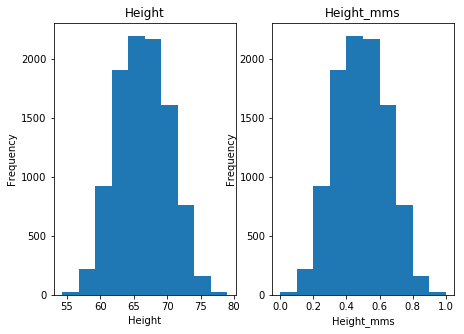

In [33]:
plt.figure(figsize=(15, 5))

for i, feature in enumerate(['Height', 'Height_mms']):
    plt.subplot(1, 4, i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)

In [34]:
X = df[['Height_mms']].values
y_true = df['Weight'].values

In [35]:
model.fit(X, y_true, epochs=40)

Epoch 1/40
10000/10000 [==============================] - 0s - loss: 40513.0425     
Epoch 2/40
10000/10000 [==============================] - 0s - loss: 629.1945     
Epoch 3/40
10000/10000 [==============================] - 0s - loss: 513.9310     
Epoch 4/40
10000/10000 [==============================] - 0s - loss: 497.0972     
Epoch 5/40
10000/10000 [==============================] - 0s - loss: 478.5865     
Epoch 6/40
10000/10000 [==============================] - 0s - loss: 457.9499     
Epoch 7/40
10000/10000 [==============================] - 0s - loss: 435.5356     
Epoch 8/40
10000/10000 [==============================] - 0s - loss: 411.5925     
Epoch 9/40
10000/10000 [==============================] - 0s - loss: 385.9860     
Epoch 10/40
10000/10000 [==============================] - 0s - loss: 359.0271     
Epoch 11/40
10000/10000 [==============================] - 0s - loss: 331.4781     
Epoch 12/40
10000/10000 [==============================] - 0s - loss: 303.9725     

In [36]:
y_pred = model.predict(X)

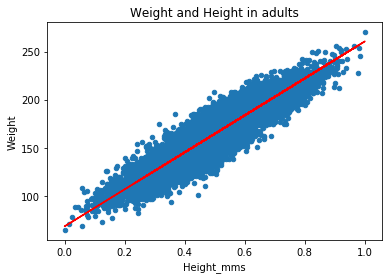

In [38]:
df.plot(kind='scatter',
        x='Height_mms',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(X, y_pred, color='red')

In [39]:
W, B = model.get_weights()

In [40]:
W

array([[ 192.19378662]], dtype=float32)

In [41]:
B

array([ 68.47800446], dtype=float32)

### confusion matrix
##### accuracy = (TP + TN)/(TP + TN + FP + FN)
##### precision = TP/(TP + FP)
##### recall = TP/(TP + FN)